In [242]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier



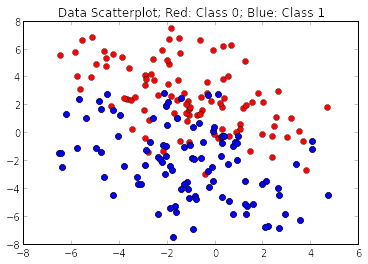

In [243]:
np.random.seed(0) # so things are 'random'

# a function to generate some simulated data
def make_data(n_per_class):
    # initializing data arrays
    group = np.empty((0, 2))
    group_labels = np.empty((0, 0))
    
    # a function to define the decision boundary between x and y
    boundary_function = lambda x: (x**3.0 + 3.0 * x**2.0 - 6.0 * x- 8.0) / 4.0
    
    for i in range(2):
        # x values
        x_value = np.random.uniform(-4, 2, size=n_per_class[i])
        
        
        # here's how the decision boundary works: we add noise so the y value point lies above or
        # below the decision boundary
        if i ==0:
            y_noise = np.random.uniform(-0.5, 5.0, size=n_per_class[i])
        else:
            y_noise = np.random.uniform(-5.0, 0.5, size=n_per_class[i])
            
        # make the x and y values
        y_value = boundary_function(x_value) + y_noise
        
        x_noise = np.random.uniform(-3, 3, size=n_per_class[i])
        x_value = x_value + x_noise
        
        # assemble the data
        tmp_group_data = np.append(x_value, y_value)
        tmp_group_data = tmp_group_data.reshape(n_per_class[i], 2, order='F')
    
        # assemble the labels
        tmp_group_labels = np.repeat([i], n_per_class[i])
    
        group = np.vstack((group, tmp_group_data))
        group_labels = np.append(group_labels, tmp_group_labels)
    
    # return a dict of data and labels
    return({'group': group, 'group_labels': group_labels})


# make data; get out the data and labels
training_data = make_data([100, 100])
train_X = training_data['group']
train_labels = training_data['group_labels']

# plot it!
plt.plot(train_X[:, 0], train_X[:, 1], 'ro')
plt.plot(train_X[np.where(train_labels==1), 0][0], 
         train_X[np.where(train_labels==1), 1][0], 'bo')
plt.title("Data Scatterplot; Red: Class 0; Blue: Class 1")



number of incorrect predictions: 33


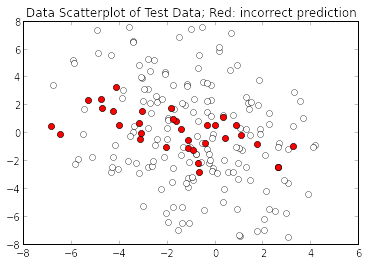

In [244]:
# fit KNN to the data, see what it gets wrong?

np.random.seed(5) # so things are 'random'

test_data = make_data([100, 100])
test_X = test_data['group']
test_true_labels = test_data['group_labels']

# try out some different k here
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_X, train_labels)
test_predicted_labels = model.predict(test_X)

wrong_prediction = (test_predicted_labels != test_true_labels)

print 'number of incorrect predictions:', np.sum(wrong_prediction) 

plt.plot(test_X[:, 0], test_X[:, 1], 'wo')
plt.plot(test_X[np.where(wrong_prediction), 0][0], 
         test_X[np.where(wrong_prediction), 1][0], 'ro')
plt.title("Data Scatterplot of Test Data; Red: incorrect prediction")

In [245]:
# scaling the data is important!

# the loan data, two covariates
loan = np.array([40000, 60000, 80000, 20000, 120000, 62000, 100000, 220000, 150000])
age = np.array([25, 35, 45, 20, 35, 40, 60, 48, 33])

raw_loan_data = np.hstack((loan.reshape(9, 1), age.reshape(9, 1)))
loan_labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

print np.hstack((raw_loan_data, loan_labels.reshape(9, 1)))

# fit a knn in the original space
model_raw = KNeighborsClassifier(n_neighbors=1)
model_raw.fit(raw_loan_data, loan_labels)

# predicting in the original space
print model_raw.predict([[21000, 45]])

# functions to normalize the two features
norm_loan = lambda x: (x - np.mean(loan)) / np.std(loan)
norm_age = lambda x: (x - np.mean(age)) / np.std(age)

# make normalized versions of the features; fit a new model
loan_normalized = norm_loan(loan)
age_normalized = norm_age(age)
normalized_loan_data = np.hstack((loan_normalized.reshape(9, 1), 
                                  age_normalized.reshape(9, 1)))

model_normalized = KNeighborsClassifier(n_neighbors=1)
model_normalized.fit(normalized_loan_data, loan_labels)

# note that we must predict in norm space
print model_normalized.predict([[norm_loan(21000), norm_age(45)]])

[[ 40000     25      0]
 [ 60000     35      0]
 [ 80000     45      0]
 [ 20000     20      0]
 [120000     35      0]
 [ 62000     40      1]
 [100000     60      1]
 [220000     48      1]
 [150000     33      1]]
[0]
[1]


[-3, 3, -3, 3]

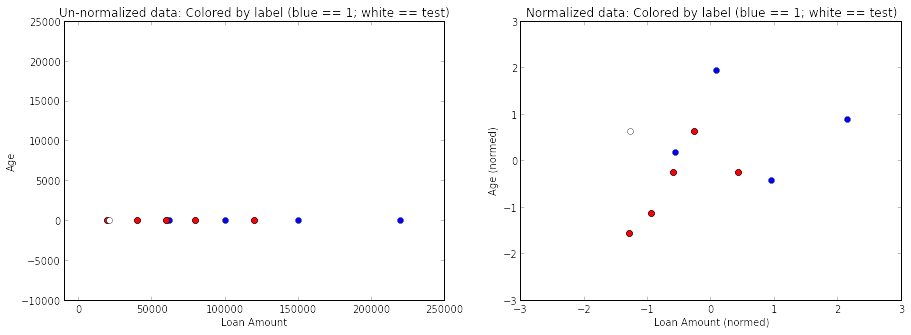

In [246]:
# what is going on? let's plot it!
plt.figure(figsize=(15,5))

# raw space
plt.subplot(1, 2, 1)
plt.plot(loan, age, 'bo')
plt.plot(loan[np.where(loan_labels==0)], 
         age[np.where(loan_labels==0)], 'ro')
plt.plot([21000], [45], 'wo')
plt.title("Un-normalized data: Colored by label (blue == 1; white == test)")
plt.xlabel('Loan Amount')
plt.ylabel('Age')
plt.axis([-10000, 250000, -10000, 25000]) 

# normalized space
plt.subplot(1, 2, 2)
plt.plot(loan_normalized, age_normalized, 'bo')
plt.plot(loan_normalized[np.where(loan_labels==0)], 
         age_normalized[np.where(loan_labels==0)], 'ro')
plt.plot([norm_loan(21000)], [norm_age(45)], 'wo')
plt.title("Normalized data: Colored by label (blue == 1; white == test)")
plt.xlabel('Loan Amount (normed)')
plt.ylabel('Age (normed)')
plt.axis([-3, 3, -3, 3])